## Stock Market & Strategy Analysis

In [16]:
from quantopian.research.experimental import history

In [17]:
clf16 = symbols('CLF16')
print(clf16)

Future(1058201601 [CLF16])


In [4]:
clf16_data = history(
    clf16, 
    fields=['price', 'volume'], 
    frequency='daily', 
    start='2015-10-21', 
    end='2015-12-21'
)

In [10]:
clf16_data.head()

,price,volume
2015-10-21 00:00:00+00:00,45.97,21833.0
2015-10-22 00:00:00+00:00,46.27,17198.0
2015-10-23 00:00:00+00:00,45.65,27287.0
2015-10-26 00:00:00+00:00,44.63,18940.0
2015-10-27 00:00:00+00:00,44.30,22071.0


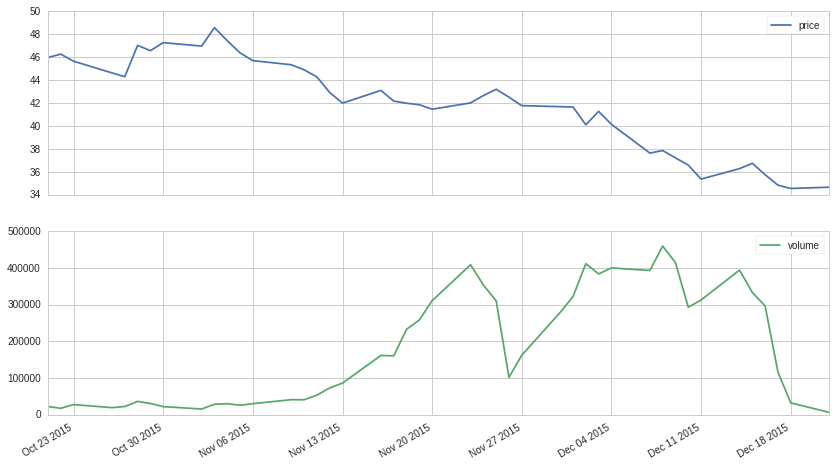

In [18]:
clf16_data.plot(subplots='True');

## Futures in Research

Quantopian provides 72 US Futures Minute wise data from Year 2002.

In [20]:
clf16 = symbols('CLF16')
clf16

Future(1058201601 [CLF16])

#### history function is used to get trailing windows of historical pricing and volume data in Research with frequencies as daily or minute wise.

In [21]:
from quantopian.research.experimental import history

In [22]:
clf16_price = history(
  'CLF16', 
  fields='price', 
  frequency='daily', 
  start='2015-10-21', 
  end='2015-12-21'
)

clf16_price.head()

2015-10-21 00:00:00+00:00    45.97
2015-10-22 00:00:00+00:00    46.27
2015-10-23 00:00:00+00:00    45.65
2015-10-26 00:00:00+00:00    44.63
2015-10-27 00:00:00+00:00    44.30
Freq: C, Name: Future(1058201601 [CLF16]), dtype: float64

In [24]:
cl_fgh_16_volume = history(
    symbols=['CLF16', 'CLG16', 'CLH16'], 
    fields='volume', 
    frequency='daily', 
    start='2015-10-21', 
    end='2015-12-21'
)

cl_fgh_16_volume.head()

,Future(1058201601 [CLF16]),Future(1058201602 [CLG16]),Future(1058201603 [CLH16])
2015-10-21 00:00:00+00:00,21833.0,2949.0,1725.0
2015-10-22 00:00:00+00:00,17198.0,2150.0,1544.0
2015-10-23 00:00:00+00:00,27287.0,3544.0,1849.0
2015-10-26 00:00:00+00:00,18940.0,2745.0,1457.0
2015-10-27 00:00:00+00:00,22071.0,3211.0,2638.0


### Plotting the daily closing price for Apple Inc. (AAPL), along with its 20 and 50 day moving averages:

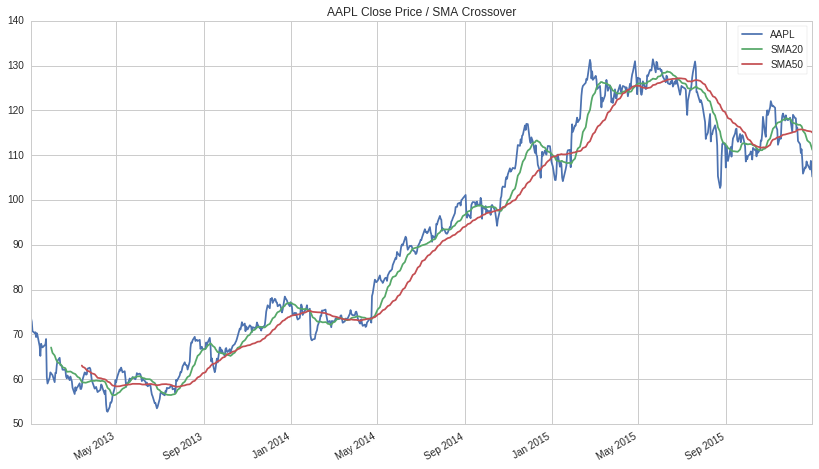

In [25]:
# Research environment functions
from quantopian.research import prices, symbols

# Pandas library: https://pandas.pydata.org/
import pandas as pd

# Query historical pricing data for AAPL
aapl_close = prices(
    assets=symbols('AAPL'),
    start='2013-01-01',
    end='2016-01-01',
)

# Compute 20 and 50 day moving averages on
# AAPL's pricing data
aapl_sma20 = aapl_close.rolling(20).mean()
aapl_sma50 = aapl_close.rolling(50).mean()

# Combine results into a pandas DataFrame and plot
pd.DataFrame({   
    'AAPL': aapl_close,
    'SMA20': aapl_sma20,
    'SMA50': aapl_sma50
}).plot(
    title='AAPL Close Price / SMA Crossover'
);

### Data Exploration

In [32]:
# Research Environment Functions
from quantopian.research import returns, symbols

# Select a time range to inspect
period_start = '2014-01-01'
period_end = '2014-12-31'

# Query returns data for AAPL over the selected time range
aapl_returns =  returns(
    assets =  symbols('AAPL'),
    start = period_start,
    end = period_end,
    )

# Display first 10 rows
aapl_returns.head(10)

2014-01-02 00:00:00+00:00   -0.014137
2014-01-03 00:00:00+00:00   -0.022027
2014-01-06 00:00:00+00:00    0.005376
2014-01-07 00:00:00+00:00   -0.007200
2014-01-08 00:00:00+00:00    0.006406
2014-01-09 00:00:00+00:00   -0.012861
2014-01-10 00:00:00+00:00   -0.006674
2014-01-13 00:00:00+00:00    0.005043
2014-01-14 00:00:00+00:00    0.020123
2014-01-15 00:00:00+00:00    0.020079
Freq: C, Name: Equity(24 [AAPL]), dtype: float64

 ### Build an algorithm that selects and trades assets based on sentiment data

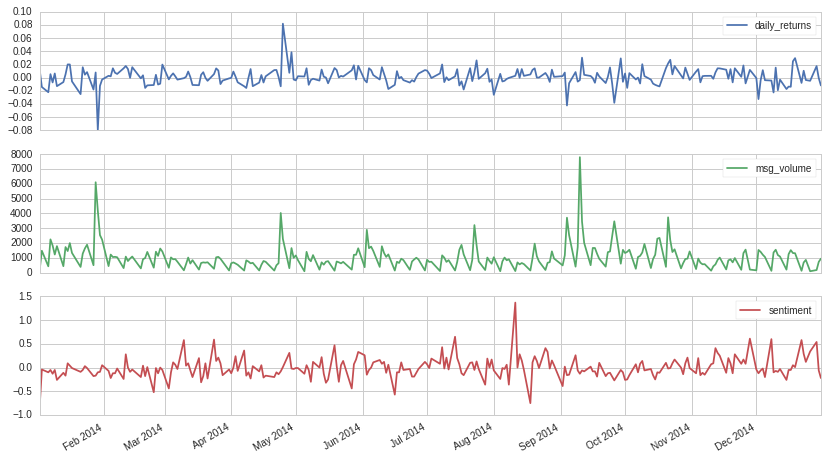

In [33]:
# Pipeline imports
from quantopian.research import run_pipeline
from quantopian.pipeline import Pipeline
from quantopian.pipeline.factors import Returns
from quantopian.pipeline.data.psychsignal import stocktwits

# Pipeline definition
def make_pipeline():

    returns = Returns(window_length=2)
    sentiment = stocktwits.bull_minus_bear.latest
    msg_volume = stocktwits.total_scanned_messages.latest

    return Pipeline(
        columns={
            'daily_returns': returns,
            'sentiment': sentiment,
            'msg_volume': msg_volume,
        },
    )

# Pipeline execution
data_output = run_pipeline(
    make_pipeline(),
    start_date=period_start,
    end_date=period_end
)

# Filter results for AAPL
aapl_output = data_output.xs(
    symbols('AAPL'),
    level=1
)

# Plot results for AAPL
aapl_output.plot(subplots=True);

### Using Pipeline API

In [34]:
# Pipeline class
from quantopian.pipeline import Pipeline
from quantopian.pipeline.data import USEquityPricing

def make_pipeline():
    
    # Get latest closing price
    close_price = USEquityPricing.close.latest
    
    # Create and return an empty Pipeline
    return Pipeline(
        columns={
            'close_price': close_price,
        }
    )

### Pipeline calculating 3 days moving average

In [35]:
# Import Pipeline class and datasets
from quantopian.pipeline import Pipeline
from quantopian.pipeline.data import USEquityPricing
from quantopian.pipeline.data.psychsignal import stocktwits

# Import built-in moving average calculation
from quantopian.pipeline.factors import SimpleMovingAverage


def make_pipeline():
    # Get latest closing price
    close_price = USEquityPricing.close.latest

    # Calculate 3 day average of bull_minus_bear scores
    sentiment_score = SimpleMovingAverage(
        inputs=[stocktwits.bull_minus_bear],
        window_length=3,
    )

    # Return Pipeline containing close_price
    # and sentiment_score
    return Pipeline(
        columns={
            'close_price': close_price,
            'sentiment_score': sentiment_score,
        }
    )

### Refering to a trading universe

An important part of developing a strategy is defining the set of assets that we want to consider trading in our portfolio. We usually refer to this set of assets as our trading universe.

In [36]:
# Import Pipeline class and datasets
from quantopian.pipeline import Pipeline
from quantopian.pipeline.data import USEquityPricing
from quantopian.pipeline.data.psychsignal import stocktwits

# Import built-in moving average calculation
from quantopian.pipeline.factors import SimpleMovingAverage

# Import built-in trading universe
from quantopian.pipeline.experimental import QTradableStocksUS


def make_pipeline():
    # Create a reference to our trading universe
    base_universe = QTradableStocksUS()

    # Get latest closing price
    close_price = USEquityPricing.close.latest

    # Calculate 3 day average of bull_minus_bear scores
    sentiment_score = SimpleMovingAverage(
        inputs=[stocktwits.bull_minus_bear],
        window_length=3,
    )

    # Return Pipeline containing close_price and
    # sentiment_score that has our trading universe as screen
    return Pipeline(
        columns={
            'close_price': close_price,
            'sentiment_score': sentiment_score,
        },
        screen=base_universe
    )

### Running the pipeline for specific time

In [37]:
# Import run_pipeline method
from quantopian.research import run_pipeline

# Execute pipeline created by make_pipeline
# between start_date and end_date
pipeline_output = run_pipeline(
    make_pipeline(),
    start_date='2013-01-01',
    end_date='2013-12-31'
)

# Display last 10 rows
pipeline_output.tail(10)

close_price  sentiment_score
2013-12-31 00:00:00+00:00 Equity(44089 [BCC])         29.66         1.000000
                          Equity(44102 [XONE])        60.50         0.396667
                          Equity(44158 [XOOM])        27.31        -0.160000
                          Equity(44249 [APAM])        64.53         0.000000
                          Equity(44270 [SSNI])        21.05         0.423333
                          Equity(44330 [AVIV])        23.48              NaN
                          Equity(44375 [PF])          26.95        -0.240000
                          Equity(44433 [TMHC])        22.13         0.000000
                          Equity(44466 [EVTC])        24.54         2.000000
                          Equity(44467 [RALY])        19.62         0.000000

### Strategy Analysis

#### Long-short equity Strategies

Long-short equity strategies consist of modeling the relative value of assets with respect to each other, and placing bets on the sets of assets that we are confident will increase (long) and decrease (short) the most in value. Long-short equity strategies profit as the spread in returns between the sets of high and low value assets increases. The quality of a long-short equity strategy relies entirely on the quality of its underling ranking model. 